In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
!wget $data -O data-week-3.csv

--2025-11-06 11:51:59--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.02s   

2025-11-06 11:52:01 (41.6 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



3.2 Data preparation
Download the data, read it with pandas
Make column names and values lowercase and no space
fill in na with 0
convert churn yes to 1 no to 0

In [4]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')  #change column titles

categorical_columns = list(df.dtypes[df.dtypes=='object'].index) #change column values

for c in categorical_columns:
    df[c]=df[c].str.lower().str.replace(' ','_')



In [6]:
tc=pd.to_numeric(df.totalcharges,errors='coerce')

In [7]:
df.totalcharges=pd.to_numeric(df.totalcharges,errors='coerce')
df.totalcharges=df.totalcharges.fillna(0)

In [8]:
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [9]:
df.churn = (df.churn =='yes').astype(int) #convert yes to 1, no to 0

In [10]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


3.3 setting up the validation framework
perform the train/validation/test split with Scikit-Learn

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=1)

In [13]:
len(df_full_train),len(df_test)

(5634, 1409)

In [14]:
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=1)

In [15]:
len(df_train),len(df_val),len(df_test)

(4225, 1409, 1409)

In [16]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [17]:
y_train=df_train.churn.values
y_val=df_val.churn.values
y_test=df_test.churn.values


In [18]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

3.4 EDA
check missing values, 
calculate churn rate
numerical and categorial variables

In [19]:
df_full_train = df_full_train.reset_index(drop=True)

In [20]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [21]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [22]:
global_churn_rate = df_full_train.churn.mean() #churn rate = mean because binary 
round(global_churn_rate,2)

np.float64(0.27)

In [23]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [24]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [25]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [26]:
numerical = ['tenure','monthlycharges', 'totalcharges']

In [27]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

3.5 Feature importance: 
female and male Churn rate
risk ratio

In [28]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [29]:
churn_female = df_full_train[df_full_train.gender=='female'].churn.mean() #mean = churn rate
churn_female

np.float64(0.27682403433476394)

In [30]:
churn_male = df_full_train[df_full_train.gender=='male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [31]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [32]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [33]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [34]:
global_churn-churn_partner

np.float64(0.06493474245795922)

In [35]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [36]:
global_churn-churn_no_partner

np.float64(-0.05984095297455855)

look at difference between global churn rate and churn rate within a group, >0 less likely to churn, <0 more likely to churn

Risk Ratio

In [37]:
churn_no_partner/global_churn

np.float64(1.2216593879412643)

In [38]:
churn_partner/global_churn

np.float64(0.7594724924338315)

group churn rate divide by global churn , if <0 , less likely to churn, >0 more likely to churn

In [39]:
from IPython.display import display

In [40]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff']=df_group['mean']-global_churn
    df_group['risk']=df_group['mean']/global_churn
    display(df_group)


gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


3.6 Feature importance: Mutual information

In [41]:
from sklearn.metrics import mutual_info_score

In [42]:
mutual_info_score(df_full_train.churn,df_full_train.contract)

0.0983203874041556

In [43]:
mutual_info_score(df_full_train.gender,df_full_train.churn)

0.0001174846211139946

In [44]:
mutual_info_score(df_full_train.churn,df_full_train.partner)

0.009967689095399745

In [45]:
def mutual_info_churn_score(series):
    return mutual_info_score(series,df_full_train.churn)

In [46]:
mi = df_full_train[categorical].apply(mutual_info_churn_score) # loop through all columns in dataframe, apply function and return series
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

3.7 Feature importance: Correlation coefficient
look at numerical columns

In [47]:
df_full_train.tenure.max()

np.int64(72)

In [48]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [49]:
df_full_train[numerical].corrwith(df_full_train.churn).abs() #if we just want to look at absolute values

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [50]:
df_full_train[df_full_train.tenure<=2].churn.mean()

np.float64(0.5953420669577875)

In [51]:
df_full_train[(df_full_train.tenure>2) & (df_full_train.tenure<=12)].churn.mean()

np.float64(0.3994413407821229)

In [52]:
df_full_train[df_full_train.monthlycharges<=20].churn.mean()

np.float64(0.08795411089866156)

In [53]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [54]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

3.8 One-Hot Encoding

In [55]:
from sklearn.feature_extraction import DictVectorizer

In [56]:
df_train[['gender','contract']].iloc[:100]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
...,...,...
95,male,one_year
96,female,month-to-month
97,male,month-to-month
98,male,one_year


In [57]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records') #change each row into a dictionary

In [58]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [59]:
dv = DictVectorizer(sparse=False).fit(train_dicts)

In [60]:
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

In [61]:
# X_train = dv.fit_transform(train_dicts)  # same as above in one line

In [62]:
X_train.shape

(4225, 45)

In [63]:
dv.get_feature_names_out()  # only tenure is a numerical variable

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [64]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [65]:
X_val = dv.transform(val_dicts) # val , only transform , not fit 

3.9 Logistic regression 
Binary classification
Linear vs logistic regression

In [66]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [67]:
z = np.linspace(-7,7,51) # creates an array of evenly spaced numbers from start to stop, including both ends
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [68]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

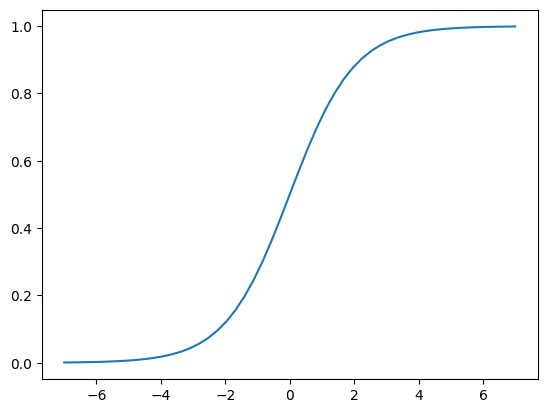

In [69]:
plt.plot(z,sigmoid(z))

In [70]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j]*w[j]
        
    return result

In [71]:
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j]*w[j]
        
    result = sigmoid(score)
    return result

3.10 Trainin logistic regression with Scikit-Learn
Train a model with Scikit-Learn
Apply it to the validation dataset
Calculate the accuracy

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [74]:
model.intercept_[0]

np.float64(-0.045323382519725265)

In [75]:
model.coef_[0].round(3)

array([ 0.685,  0.039, -0.682,  0.056, -0.015,  0.114, -0.16 ,  0.087,
        0.039,  0.002, -0.497,  0.698, -0.16 , -0.018, -0.187,  0.066,
        0.162,  0.117, -0.16 ,  0.084,  0.285, -0.16 , -0.084, -0.161,
        0.202, -0.045,  0.086, -0.052, -0.003,  0.106, -0.011,  0.066,
       -0.025,  0.194, -0.094, -0.16 ,  0.295, -0.054, -0.16 ,  0.255,
        0.235, -0.16 , -0.034, -0.069,  0.   ])

In [76]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.0066238 , 0.20482253, 0.21781799, ..., 0.15149644, 0.78847856,
       0.81190391], shape=(1409,))

In [77]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [78]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 315, dtype: object

In [79]:
y_val

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [80]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [81]:
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [82]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.006624,0,0,True
1,0.204823,0,0,True
2,0.217818,0,0,True
3,0.563750,1,1,True
4,0.218675,0,0,True
...,...,...,...,...
1404,0.291307,0,0,True
1405,0.041390,0,1,False
1406,0.151496,0,0,True
1407,0.788479,1,1,True


In [83]:
df_pred.correct.mean()

np.float64(0.8034066713981547)

3.11 Model interpretation
Look at coefficients
Train a smaller model with fewer features

In [84]:
a = [1,2,3,4]
b = 'abcd'

In [86]:
dict(zip(a,b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [92]:
dict(zip(dv.get_feature_names_out(),model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.685),
 'contract=one_year': np.float64(0.039),
 'contract=two_year': np.float64(-0.682),
 'dependents=no': np.float64(0.056),
 'dependents=yes': np.float64(-0.015),
 'deviceprotection=no': np.float64(0.114),
 'deviceprotection=no_internet_service': np.float64(-0.16),
 'deviceprotection=yes': np.float64(0.087),
 'gender=female': np.float64(0.039),
 'gender=male': np.float64(0.002),
 'internetservice=dsl': np.float64(-0.497),
 'internetservice=fiber_optic': np.float64(0.698),
 'internetservice=no': np.float64(-0.16),
 'monthlycharges': np.float64(-0.018),
 'multiplelines=no': np.float64(-0.187),
 'multiplelines=no_phone_service': np.float64(0.066),
 'multiplelines=yes': np.float64(0.162),
 'onlinebackup=no': np.float64(0.117),
 'onlinebackup=no_internet_service': np.float64(-0.16),
 'onlinebackup=yes': np.float64(0.084),
 'onlinesecurity=no': np.float64(0.285),
 'onlinesecurity=no_internet_service': np.float64(-0.16),
 'onlinesecurity=yes': np.flo

In [93]:
small = ['contract','tenure','monthlycharges']

In [95]:
df_train[small].iloc[:10].to_dict(orient='records') # turn each row into a dict

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
5,month-to-month,4,30.50
6,month-to-month,1,75.10
7,month-to-month,1,70.30
8,two_year,72,19.75
9,month-to-month,6,109.90


In [96]:
dicts_train_small = df_train[small].to_dict(orient='records')  # turn each row into a dict
dicts_val_small = df_val[small].to_dict(orient='records')


In [97]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [99]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [101]:
X_train_small = dv_small.transform(dicts_train_small)

In [102]:
model_small = LogisticRegression()
model_small.fit(X_train_small,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [105]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.477957595829565)

In [106]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [107]:
dict(zip(dv_small.get_feature_names_out(),w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [109]:
-2.47+0.97+50*0.027+5*(-0.036)

np.float64(0.41824062315816374)

In [110]:
sigmoid(-2.47+0.97+50*0.027+5*(-0.036))

np.float64(0.41824062315816374)

3.12 Using the model

In [114]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [115]:
dv = DictVectorizer(sparse= False)
X_full_train = dv.fit_transform(dicts_full_train)

In [116]:
y_full_train = df_full_train.churn.values

In [119]:
model = LogisticRegression(max_iter=10000)
model.fit(X_full_train,y_full_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [120]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [122]:
X_test = dv.transform(dicts_test)

In [123]:
y_pred = model.predict_proba(X_test)[:,1]

In [124]:
churn_decision = (y_pred >= 0.5)

In [125]:
(churn_decision == y_test).mean()

np.float64(0.8105039034776437)

test with a customer data

In [134]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [135]:
X_small = dv.transform([customer])

In [136]:
model.predict_proba(X_small)[0,1]

np.float64(0.6375704661276868)

In [137]:
y_test[-1]

np.int64(1)